In [1]:
# Dependencies
import pandas as pd
import requests
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import datetime


# Google developer API key
from config import gkey

# Configure gmaps




In [2]:
# Store filepath in a variable
file_one = "./listings.csv"

In [3]:
# Read file
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [4]:
# Remove useless columns

clean_df = file_one_df[["id","host_id","host_name","host_listings_count","neighbourhood_cleansed","zipcode","latitude",'longitude',"property_type","room_type","accommodates","bathrooms","bedrooms","beds","square_feet","price","minimum_nights","maximum_nights","has_availability","availability_365","number_of_reviews","review_scores_value"]]
clean_df.head(10)

,id,host_id,host_name,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_value
0,6860,16038,Festive,3.0,Ward E (councilmember James Solomon),07302,40.72613,-74.04811,Loft,Entire home/apt,...,1.0,1.0,NaN,$163.00,2,120,t,236,41,9.0
1,26154,102760,Javier,1.0,Ward C (councilmember Richard Boggiano),07306,40.73093,-74.06988,Apartment,Entire home/apt,...,1.0,1.0,NaN,$135.00,5,730,t,304,19,9.0
2,40669,175412,Skyy,2.0,Ward C (councilmember Richard Boggiano),07306,40.73742,-74.05255,Condominium,Private room,...,1.0,0.0,288.0,$82.00,3,365,t,350,9,10.0
3,58350,279101,Martin,1.0,Ward E (councilmember James Solomon),07302,40.72119,-74.04085,Apartment,Entire home/apt,...,1.0,1.0,NaN,$395.00,15,220,t,362,2,10.0
4,72548,190600,Susan And Ivan,1.0,Ward F (councilmember Jermaine D. Robinson),07304,40.71386,-74.06325,Apartment,Entire home/apt,...,1.0,2.0,NaN,$90.00,7,30,t,273,85,10.0
5,81066,439043,Juliet,2.0,Ward B (councilmember Mira Prinz-Arey),07305,40.71055,-74.08522,Bed and breakfast,Private room,...,2.0,3.0,4000.0,$189.00,1,4,t,341,0,NaN
6,82797,450770,Molly,1.0,Ward E (councilmember James Solomon),07302,40.71645,-74.04183,Apartment,Entire home/apt,...,1.0,0.0,NaN,$100.00,7,1125,t,0,9,10.0
7,146144,266070,Patricia,1.0,Ward E (councilmember James Solomon),07302,40.71077,-74.03833,Apartment,Shared room,...,1.0,1.0,NaN,$200.00,2,2,t,365,0,NaN
8,215768,846837,Charlaine,3.0,Ward F (councilmember Jermaine D. Robinson),07304,40.71663,-74.05799,House,Entire home/apt,...,1.0,2.0,NaN,$95.00,6,365,t,325,117,10.0
9,249836,1288340,Bozena,4.0,Ward D (councilmember Michael Yun),07307,40.75869,-74.05043,House,Private room,...,1.0,1.0,NaN,$50.00,2,25,t,317,163,9.0


In [5]:
# Replace similar property types and group them together
# Fix warning later
clean_df["property_type"]= clean_df["property_type"].replace("Aparthotel", "Hotel")
clean_df["property_type"]= clean_df["property_type"].replace("Boutique hotel", "Hotel")
clean_df["property_type"]= clean_df["property_type"].replace("Serviced apartment", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Condominium", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Bed and breakfast", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Guest suite", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Guesthouse", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Loft", "Apartment")
clean_df["property_type"]= clean_df["property_type"].replace("Tiny house", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Cottage", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Cabin", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Dome house", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Bungalow", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Townhouse", "House")
clean_df["property_type"]= clean_df["property_type"].replace("Castle", "Other")
clean_df["property_type"]= clean_df["property_type"].replace("Hostel", "Other")
property_types= clean_df.groupby("property_type").count()["id"]
property_types

C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

property_type
Apartment    2343
Hotel          17
House         642
Other          18
Name: id, dtype: int64

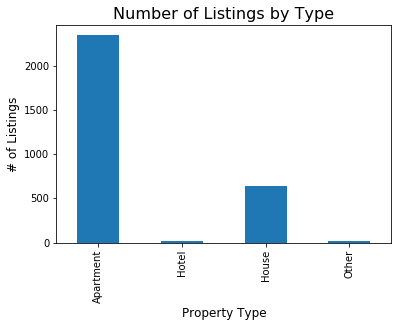

In [6]:
# Data Visualization 1: Number of Listings by Type
number_of_listings = property_types.plot(kind="bar")
plt.title("Number of Listings by Type", fontsize=16)
plt.ylabel("# of Listings", fontsize=12)
plt.xlabel("Property Type", fontsize=12)
plt.show()

In [7]:
reviews = clean_df.groupby("property_type").sum()["number_of_reviews"]
reviews

property_type
Apartment    57943
Hotel          943
House        23710
Other          306
Name: number_of_reviews, dtype: int64

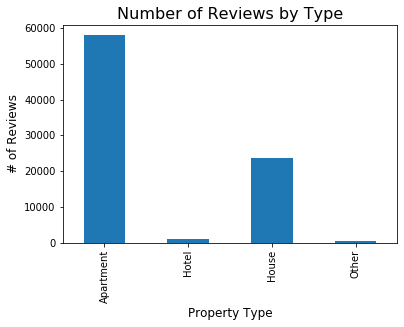

In [8]:
# Data Visualization 4: Number of Reviews by Type
number_of_reviews = reviews.plot(kind="bar")
plt.title("Number of Reviews by Type", fontsize=16)
plt.ylabel("# of Reviews", fontsize=12)
plt.xlabel("Property Type", fontsize=12)
plt.show()

In [9]:
# Data Visualization 7: Map of Listings
# Store latitude and longitutde in locations
locations = clean_df[["latitude", "longitude"]]

# Create Jersey City Map
jersey_city_coordinates = (40.7178, -74.0431)
jersey_city = gmaps.figure(center = jersey_city_coordinates, zoom_level=12)
# Create Heat Layer
heatmap_layer =  gmaps.heatmap_layer(locations)
jersey_city.add_layer(heatmap_layer)
jersey_city

Figure(layout=FigureLayout(height='420px'))

In [10]:
# Remove dollar signs and commas from price column - we need to do this for anything we are doing math with

clean_df["price"] = clean_df["price"].apply(lambda x: x.replace("$",""))
clean_df["price"] = clean_df["price"].apply(lambda x: x.replace(",",""))

# And cast as float
clean_df['price'] = clean_df['price'].astype(float)
clean_df.head()

# Fix warning later

C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aizel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,id,host_id,host_name,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,bedrooms,beds,square_feet,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_value
0,6860,16038,Festive,3.0,Ward E (councilmember James Solomon),07302,40.72613,-74.04811,Apartment,Entire home/apt,...,1.0,1.0,NaN,163.0,2,120,t,236,41,9.0
1,26154,102760,Javier,1.0,Ward C (councilmember Richard Boggiano),07306,40.73093,-74.06988,Apartment,Entire home/apt,...,1.0,1.0,NaN,135.0,5,730,t,304,19,9.0
2,40669,175412,Skyy,2.0,Ward C (councilmember Richard Boggiano),07306,40.73742,-74.05255,Apartment,Private room,...,1.0,0.0,288.0,82.0,3,365,t,350,9,10.0
3,58350,279101,Martin,1.0,Ward E (councilmember James Solomon),07302,40.72119,-74.04085,Apartment,Entire home/apt,...,1.0,1.0,NaN,395.0,15,220,t,362,2,10.0
4,72548,190600,Susan And Ivan,1.0,Ward F (councilmember Jermaine D. Robinson),07304,40.71386,-74.06325,Apartment,Entire home/apt,...,1.0,2.0,NaN,90.0,7,30,t,273,85,10.0


In [11]:
# Total value of price column
total_price = clean_df["price"].sum()

# Total number of listings
total_listing_count = clean_df["id"].nunique()

# Total
print(total_price)
print(total_listing_count)

492514.0
3020


In [12]:
# Create new dataframe grouped by zipcode
zipcode_df = clean_df.groupby("zipcode")

# Get number of unique zipcodes
zipcode_count = zipcode_df["id"].nunique()

# Get sum of price for each zipcode
zipcode_sum = zipcode_df["price"].sum()

In [13]:
# Calculate percentage of listings in each zip code
percentage_by_zipcode = zipcode_count/total_listing_count * 100

# Not sure if i need this -- price_percentage_by_zipcode = zipcode_sum/total_price * 100

# Create data frame and..
zipcode_percentage_df = pd.DataFrame({"Percentage of listings": percentage_by_zipcode,
                                      "Total number of listings": zipcode_count,
                                      "Total Revenue": zipcode_sum})

# Fomat results
zipcode_percentage_df = zipcode_percentage_df.style.format({"Percentage of listings":"{:,.2f}%",
                                                         "Total Revenue":"${:,.2f}"})
zipcode_percentage_df

,Percentage of listings,Total number of listings,Total Revenue
zipcode,,,
07002,0.17%,5,$576.00
07030,0.56%,17,"$12,440.00"
07047,0.30%,9,$431.00
07087,0.30%,9,"$1,120.00"
07302,27.38%,827,"$155,889.00"
07302-8544,0.03%,1,$325.00
07304,10.76%,325,"$33,566.00"
07305,7.38%,223,"$22,184.00"
07306,20.66%,624,"$69,875.00"


In [14]:
# New dataframe grouped by ward
ward_df = clean_df.groupby("neighbourhood_cleansed")

# Total number of listings per ward
ward_count = ward_df["id"].nunique()

# Total Revenue of each ward
ward_sum = ward_df["price"].sum()


In [15]:
# This block is the same as zipcode, but for ward

percentage_by_ward = ward_count/total_listing_count * 100

# Create dataframe
ward_percentage_df = pd.DataFrame({"Percentage of listings": percentage_by_ward,
                                      "Total number of listings": ward_count,
                                      "Total Revenue": ward_sum})
# Fomat results
ward_percentage_df = ward_percentage_df.style.format({"Percentage of listings":"{:,.2f}%",
                                                         "Total Revenue":"${:,.2f}"})
ward_percentage_df

,Percentage of listings,Total number of listings,Total Revenue
neighbourhood_cleansed,,,
Ward A (councilmember Denise Ridley),3.97%,120,"$10,355.00"
Ward B (councilmember Mira Prinz-Arey),8.21%,248,"$27,977.00"
Ward C (councilmember Richard Boggiano),18.91%,571,"$67,692.00"
Ward D (councilmember Michael Yun),14.11%,426,"$56,482.00"
Ward E (councilmember James Solomon),42.72%,1290,"$289,181.00"
Ward F (councilmember Jermaine D. Robinson),12.09%,365,"$40,827.00"


In [16]:
# Didnt have enough time to see what numbers would be good. I think we can do this for maximum number of nights allowed
# ^^
# Maybe use the .quantile stuff we learned to find the quartiles of the data?
# What do you guys think?

# Set bins
time_bins = [0, 5, 10, 20, 40, 60, 100, 150, 365]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
#^ These have to be changed

In [17]:
# New datafram grouped by room type
room_type_df = clean_df.groupby("room_type")

# Total listings grouped by room type
room_type_count = room_type_df["id"].nunique()

# Calculate percentage of room types
room_type_percentage = room_type_count/total_listing_count * 100


In [18]:
# Create dataframe
room_type_percentage_df = pd.DataFrame({"Percentage of listings": room_type_percentage,
                                      "Total number of listings": room_type_count})
# Fomat results
room_type_percentage_df = room_type_percentage_df.style.format({"Percentage of listings":"{:,.2f}%"})
room_type_percentage_df

,Percentage of listings,Total number of listings
room_type,,
Entire home/apt,66.92%,2021
Hotel room,2.22%,67
Private room,29.07%,878
Shared room,1.79%,54
